# Auto ML experimentation

## 1.0 - Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from pycaret.classification import *
from pycaret.datasets import get_data
from pycaret.utils import check_metric

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

## 2.0 - Data Extraction

In [8]:
# seeing all data availible sets
# all_dataset = get_data('index')

In [2]:
# getting the data 
wine_df = get_data('wine')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Calculating the Feature importance by Random Forest

In [3]:
X = wine_df.drop('type', axis=1)
y = wine_df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [4]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

<BarContainer object of 12 artists>

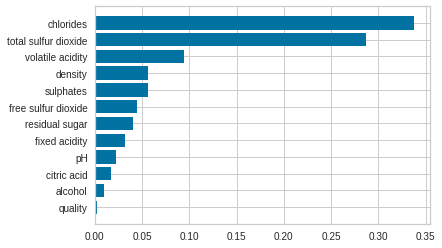

In [38]:
sorted_index = rf.feature_importances_.argsort()

plt.barh(
    X.columns[sorted_index], 
    rf.feature_importances_[sorted_index]
);

Calculating the Feature importance by Pycaret

In [41]:
exp_01 = setup(
    data=wine_df,
    target='type', 
    session_id=123,
    numeric_features=['quality'],
    feature_selection=True,
    silent=True,
    verbose=True
)

,Description,Value
0,session_id,123
1,Target,type
2,Target Type,Binary
3,Label Encoded,"red: 0, white: 1"
4,Original Data,"(6497, 13)"
5,Missing Values,False
6,Numeric Features,12
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [42]:
df_transformed = get_config('X_train')
df_transformed.head()

,chlorides,alcohol,residual sugar,free sulfur dioxide,sulphates,volatile acidity,pH,total sulfur dioxide,density,citric acid,fixed acidity
2457,0.038,10.0,10.2,60.0,0.54,0.22,3.17,149.0,0.99725,0.39,6.7
524,0.086,9.5,2.4,23.0,0.64,0.43,3.23,116.0,0.99760,0.49,9.2
4551,0.041,9.0,1.8,9.0,0.54,0.27,3.08,109.0,0.99290,0.25,6.1
5954,0.039,12.7,2.5,34.0,0.38,0.31,3.22,137.0,0.98946,0.28,6.4
3759,0.040,11.0,9.7,29.0,0.48,0.33,3.47,124.0,0.99540,0.38,6.0
